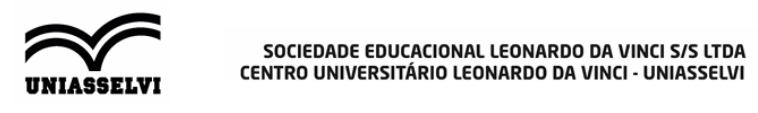

#**PROJETO II - APLICAÇÃO DE MÉTODOS DE APRENDIZADO DE MÁQUINA**

###**Nomes dos Acadêmicos e Matrículas:**

Adilio de Sousa Farias  - Matrícula  3275870\
Anderson Martins        - Matrícula 3082488\
Celicio de Jesus Junior - Matrícula 3306784\
Elyel Backes Pedroso    - Matrícula 3373348\
Guilherme Alves Leão    - Matrícula 3330970\
Lucas da Silva Lima     - Matrícula 3445139

## Objetivo do Projeto

Prever se uma pessoa desenvolverá diabetes ou não, de acordo com as algumas características apresentadas em exames aplicando algoritmos de analise de machine learning, com uma acurácia mínima de 70%

## Especificação Técnica do Projeto

**Descrição dos campos da base de dados e
os tipos de dados que serão trabalhados:**

Base de dados: pima-data. Fonte: Kaggle. A base está em formato csv (valores separados por vírgulas) e possui 768 linhas e 10 colunas.

**Métodos de Pré-processamento:** Aplicamos nesse dataset a limpeza da  base, onde foram removidas as linhas duplicadas. Verificou-se também a inexistência de valores nulos ou ausentes.

**Tarefa de Aprendizado:** Será aplicada a tarefa de Classificação.

**Modo de aprendizado:** Supervisionado.

**Métodos de machine learning utilizados/Algoritmos avaliados:**\
Aplicaremos o algoritmo de Redes Neurais e faremos comparações com algoritmos previamente estudados pelo grupo.

**Métricas de avaliação utilizadas:**\
A métrica de avaliação aplicada será a Acurácia

###Informações sobre o dataset

O dataset diabetes.csv contém informações médicas de 768 pacientes do sexo feminino com pelo menos 21 anos de idade de origem indígena Pima, que vivem perto de Phoenix, Arizona, EUA. As informações foram coletadas em vários momentos entre 1988 e 1990 e incluem 8 variáveis preditoras:

* Gravidez: Número de vezes que a mulher esteve grávida.
* Glicose: Concentração de glicose plasmática 2 horas após um teste de tolerância à glicose oral.
* PressaoSanguinea: Pressão arterial diastólica (mm/Hg).
* EspessuraPele: Espessura da dobra cutânea do tríceps (em mm).
* Insulina: Nível de insulina sérica 2 horas após uma refeição (mu U/ml).
* IMC: Índice de massa corporal (peso em kg / (altura em m)²).
* FuncaoPedigreeDiabetes: Função de pedigree de diabetes (também conhecida como Índice de herança genética).
* Idade: Idade (em anos).
* Resultado: Variável de classe (0 ou 1).

A variável de destino é o status da diabetes (Resultado), que foi definido como 0 para pacientes que não apresentam diabetes e 1 para pacientes que apresentam diabetes. O dataset é frequentemente usado para treinar e avaliar modelos de aprendizado de máquina para a predição do status da diabetes com base nas informações médicas fornecidas.

##Importação das bibliotecas necessárias

Importação das bibliotecas e módulos:

*   **pandas** para processamento e manipulação de dados.
*   **numpy** para funções matemáticas.
*   **train_test_split** módulo para dividir o conjunto de dados em treino e teste.
*   **StandardScaler** classe para padronização de recursos no conjunto de dados (média 0 e variância unitária).
*   **accuracy_score e confusion_matrix** funções para avaliar a precisão e criar uma matriz de confusão, respectivamente.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##Análise Exploratória dos Dados


In [ ]:
# Carregando o conjunto de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['gravidezes', 'glicose', 'pressaoSanguinea', 'espessuraPele', 'insulina', 'imc', 'pedigree', 'idade', 'resultado']
data = pd.read_csv(url, names=names)

In [ ]:
# Verificando as 5 primeiros linhas do conjunto de dados
data.head()

,gravidezes,glicose,pressaoSanguinea,espessuraPele,insulina,imc,pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gravidezes        768 non-null    int64  
 1   glicose           768 non-null    int64  
 2   pressaoSanguinea  768 non-null    int64  
 3   espessuraPele     768 non-null    int64  
 4   insulina          768 non-null    int64  
 5   imc               768 non-null    float64
 6   pedigree          768 non-null    float64
 7   idade             768 non-null    int64  
 8   resultado         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Verificando se há valores nulos nos atributos
data.isnull().sum()

gravidezes          0
glicose             0
pressaoSanguinea    0
espessuraPele       0
insulina            0
imc                 0
pedigree            0
idade               0
resultado           0
dtype: int64

In [ ]:
# Verificando dados duplicados
data.duplicated().sum()

0

In [ ]:
# Verificando dados estatísticos arredondados e com background de escala
data.describe().round(2).style.background_gradient()

,gravidezes,glicose,pressaoSanguinea,espessuraPele,insulina,imc,pedigree,idade,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850000,120.890000,69.110000,20.540000,79.800000,31.990000,0.470000,33.240000,0.350000
std,3.370000,31.970000,19.360000,15.950000,115.240000,7.880000,0.330000,11.760000,0.480000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Análise Gráfica dos dados

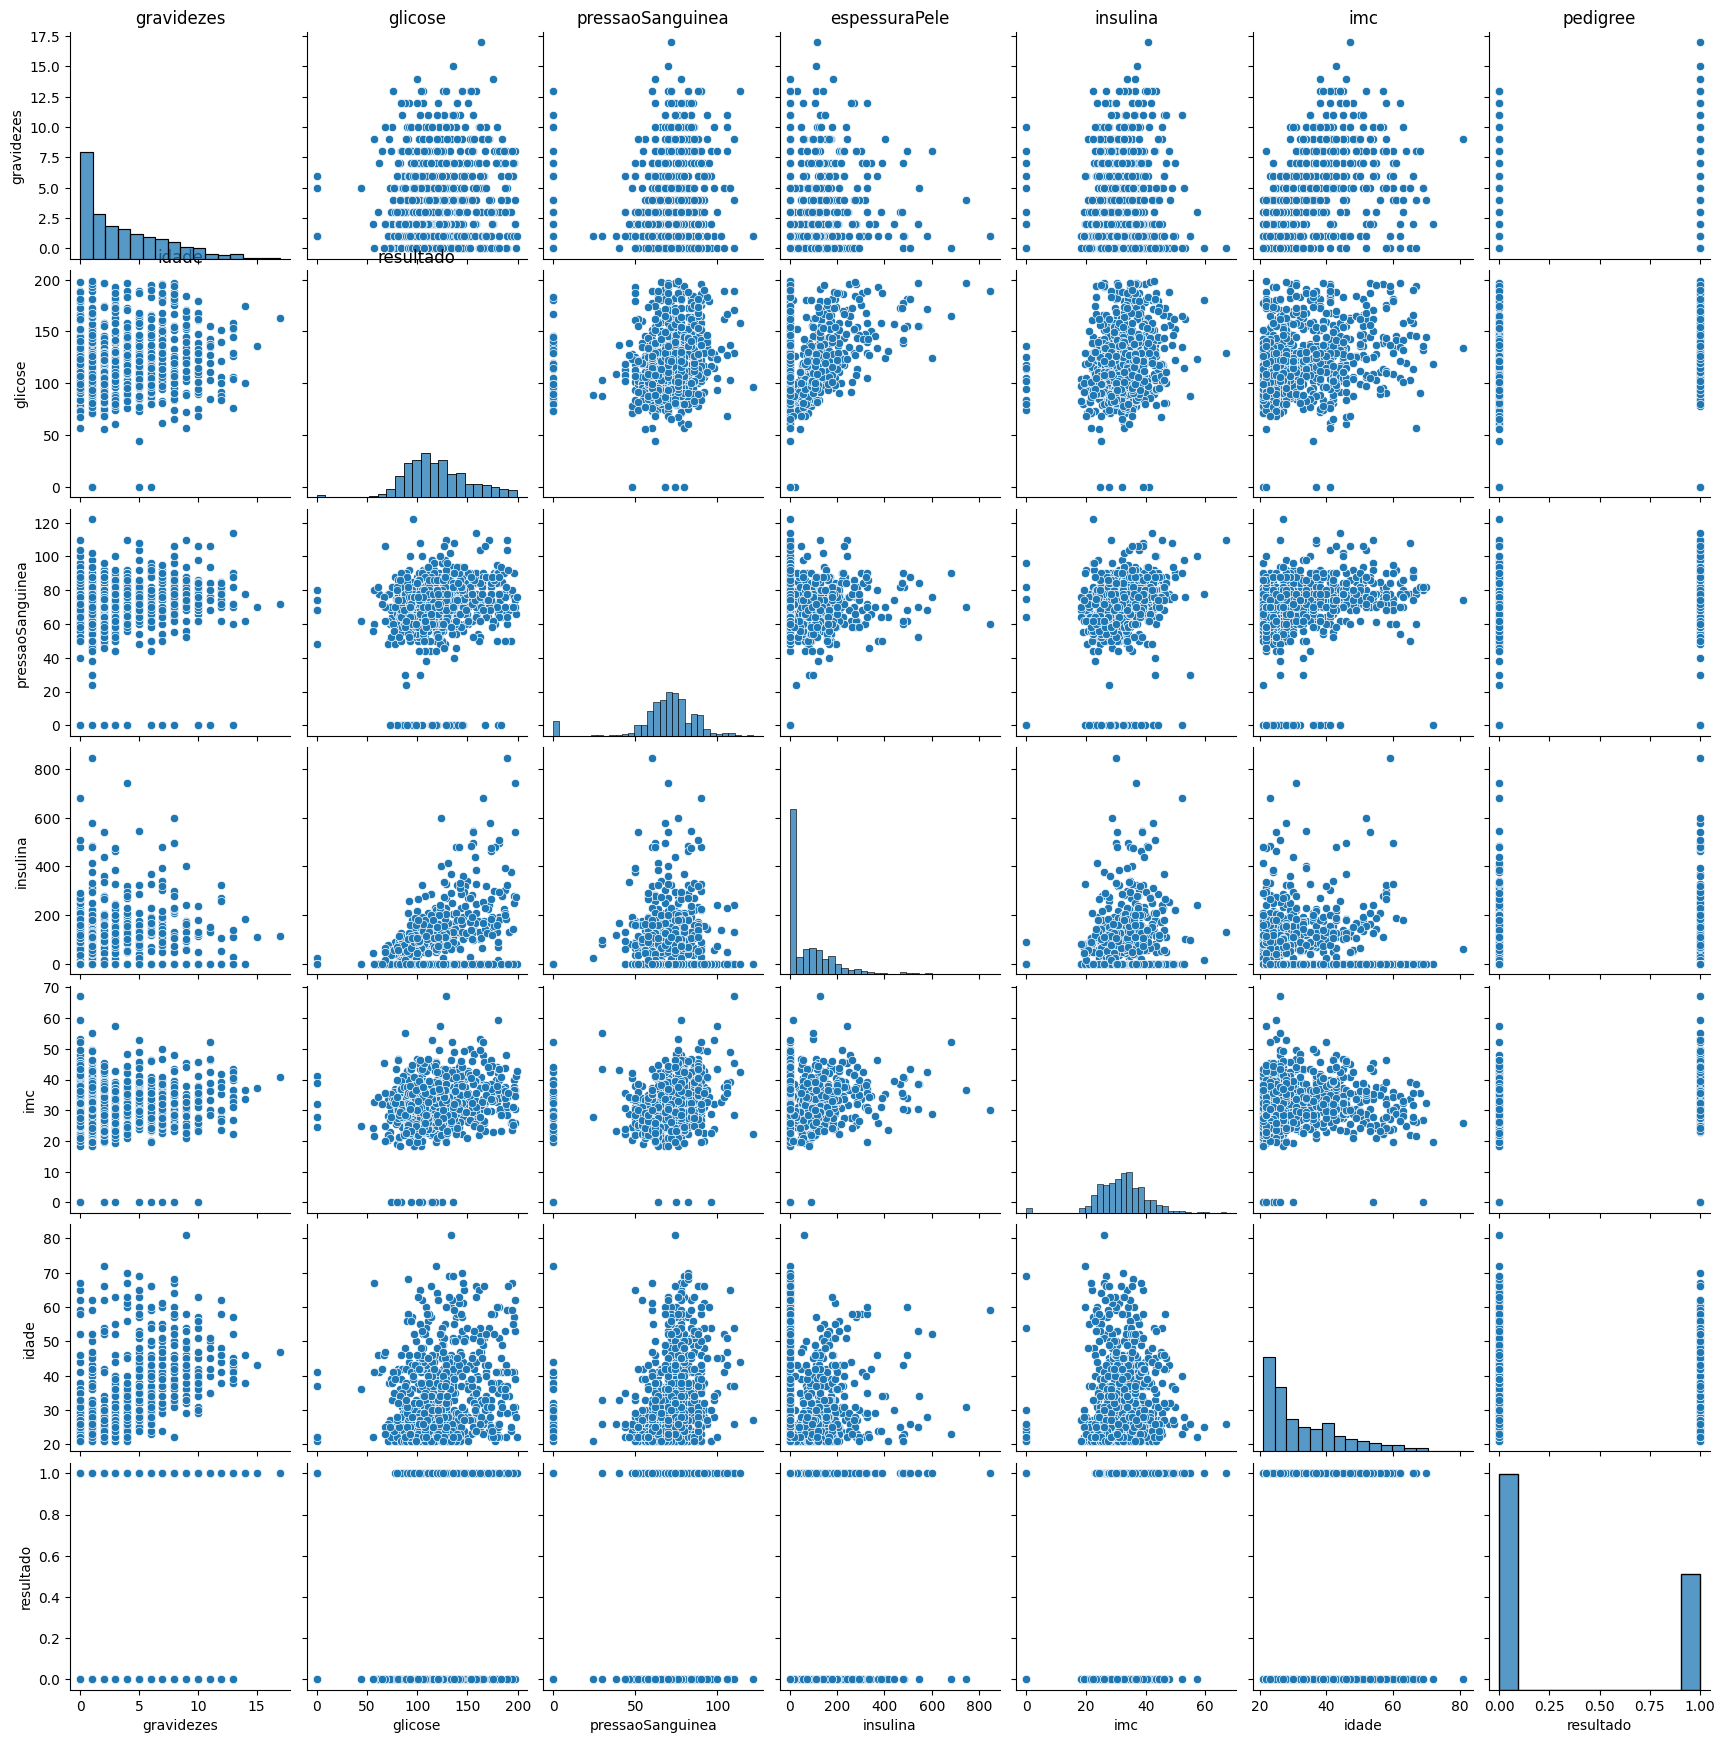

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Plot Geral
g = sns.pairplot(data, vars=data[['gravidezes', 'glicose', 'pressaoSanguinea','insulina', 'imc', 'idade', 'resultado']]);

for ax, col in zip(g.axes.flat, data.columns):
    ax.set_title(col, fontsize=12)
    ax.title.set_position([0.5, 1.05])

plt.show()

<Axes: >

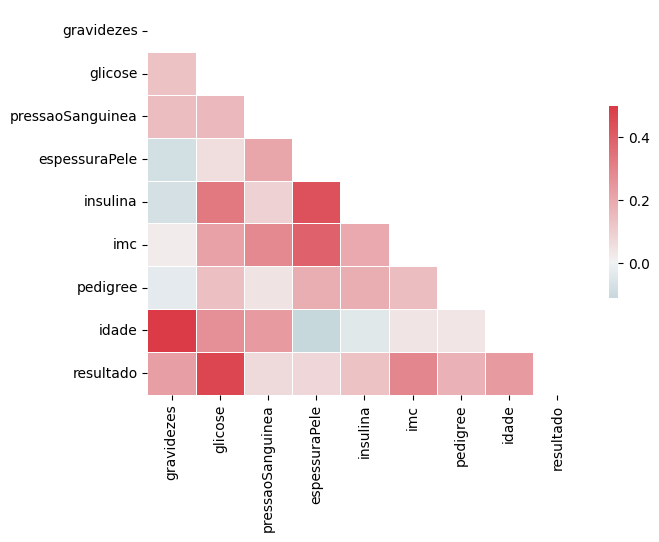

In [ ]:
# Verificando a correlação entre os atributos (colunas)
corr=data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Criando gráfico de pizza para enxergar a proporção dos que tem ou não tem diabetes
lis=["Não tem diabetes","Tem diabetes"]
have_or_not = data["resultado"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]
fig = px.pie(values=data['resultado'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"],
             title="Percentual dos que tem ou não diabetes")
plt.figure(figsize=(4,4))
fig.show()

<Figure size 400x400 with 0 Axes>

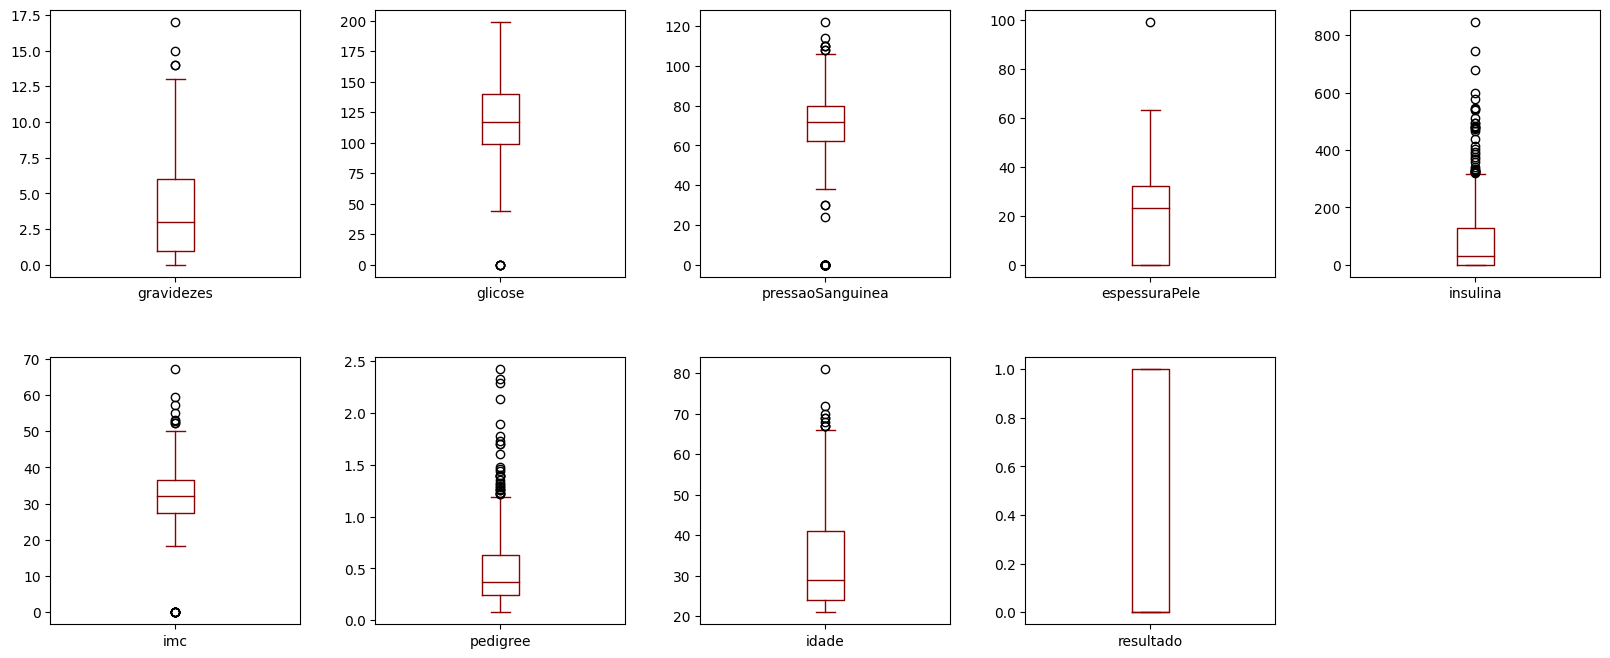

In [ ]:
# Boxplot com as colunas do dataset
data.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

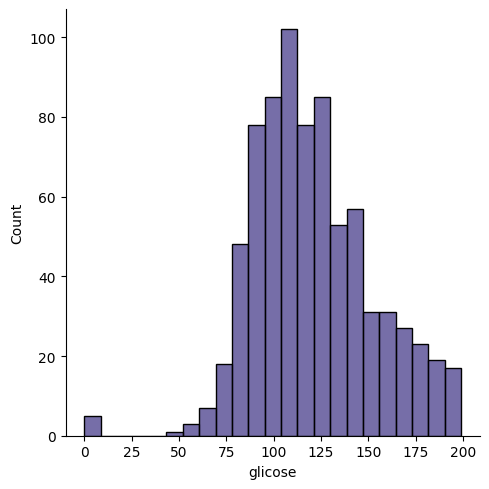

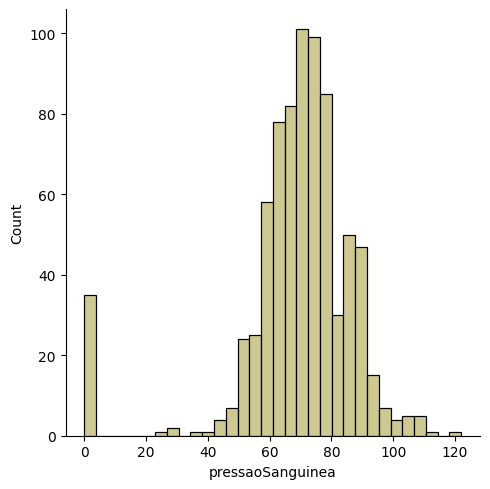

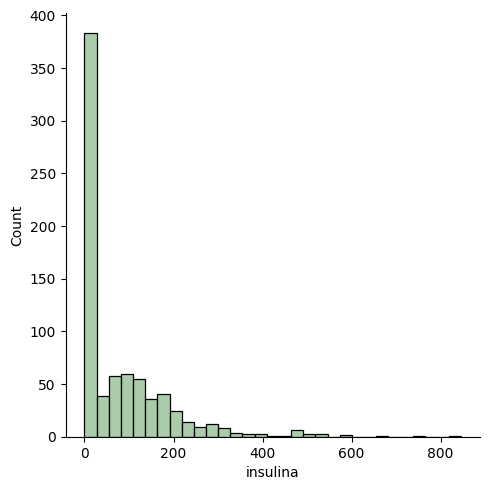

In [ ]:
# Visualizando a distribuição de frequências das variáveis Glicose, Pressão Sanguínea e Insulina
sns.displot(data['glicose'], color ="DarkSlateBlue")
sns.displot(data['pressaoSanguinea'], color = 'DarkKhaki')
sns.displot(data['insulina'], color ="DarkSeaGreen" )
plt.show()

## Pré-processamento de dados

###Dividindo os dados em conjunto de treinamento e conjunto de teste

In [ ]:
# Separando as características (features) e o alvo (target)
X = data.drop('resultado', axis=1)
y = data['resultado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Padronizando os recursos

O objetivo da padronização é eviar que certas variáveis tenham maior influência nos resutados devido a suas escalas diferentes.


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mostrando as duas classes para a ocorrência de diabetes (0 não e 1 sim). Percebe-se aqui um desbalanceamento de classes, o que pode prejudicar o resultado da nossa avaliação

In [ ]:
data['resultado'].value_counts()

0    500
1    268
Name: resultado, dtype: int64

### Aplicando a substituição de 0 por valores ausentes

Esse dataset tem uma característica muito particular, que são os chamados valores **missings** ocultos. Por isso vamos usar a estratégia da média para substituí-los.

In [ ]:
# Substituindo valores 0 com valores ausentes
data[['glicose', 'pressaoSanguinea', 'espessuraPele', 'insulina', 'imc']] = data[['glicose', 'pressaoSanguinea', 'espessuraPele', 'insulina', 'imc']].replace(0, np.nan)

# Preenchendo valores ausentes com média
data.fillna(data.mean(), inplace=True)

##Criação do modelo de Rede Neural

Definindo e configurando um modelo de rede neural usando a biblioteca Keras

Criação do objeto model_neural de 3 camadas, do tipo Sequential, que é uma classe do keras.

In [ ]:
model_neural = keras.Sequential([
    layers.Dense(34, activation='relu', input_shape=[8]),
    layers.Dense(34, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Configuração do processo de treinamento do modelo.
 Otimizador escolhido: adam
 Função de perda: binary_crossentropy
 Métrica utilizada: acurácia.

In [ ]:
model_neural.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

##Treinamento do modelo de Rede Neural

In [ ]:
# Definir a semente aleatória
np.random.seed(42)
tf.random.set_seed(42)

#batch_size por padrão é 32 no keras. esse parâmetro representa a quantidade de amostras dentro de um grupamento
historico = model_neural.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 0.6416 - accuracy: 0.6701 - val_loss: 0.6162 - val_accuracy: 0.6911
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5809 - accuracy: 0.7169 - val_loss: 0.5819 - val_accuracy: 0.6992
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5409 - accuracy: 0.7393 - val_loss: 0.5515 - val_accuracy: 0.7154
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5079 - accuracy: 0.7719 - val_loss: 0.5330 - val_accuracy: 0.7236
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4861 - accuracy: 0.7821 - val_loss: 0.5208 - val_accuracy: 0.7236
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.4712 - accuracy: 0.7882 - val_loss: 0.5096 - val_accuracy: 0.7236
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4604 - accuracy: 0.7923 - val_loss: 0.5039 - val_accuracy: 0.7073
Epoch 8/20
16/16 [=

##Avaliação do modelo de Rede Neural

#### Avaliando a Acurácia do modelo de Rede Neural

Método evaluate do objeto model_neural avalia o modelo em um conjunto de teste. O retorno dele é o valor da função de perda e a acurácia do modelo no conjunto de teste.

In [ ]:
test_loss, test_acc = model_neural.evaluate(X_test, y_test, verbose=2) # verbose 2 exibe informaçoes detalhadas durante a avaliação.
print(f'Acurácia do modelo: {round(test_acc*100, 2)}%')

5/5 - 0s - loss: 0.5500 - accuracy: 0.7338 - 49ms/epoch - 10ms/step
Acurácia do modelo: 73.38%


Importar Bibliotecas para visualização gráfica

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

####Criando os gráficos de evolução da função de Loss e Accuracy


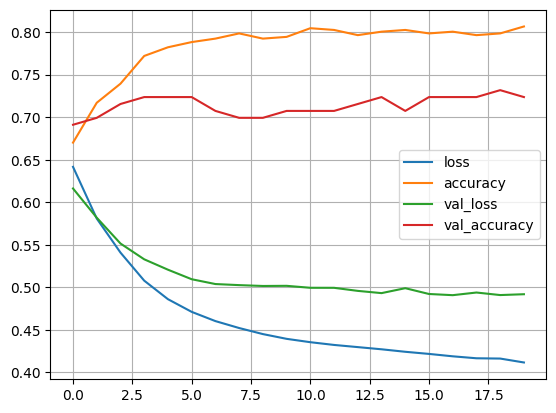

In [ ]:
# acurácia de validação acompanhando a acurácia de treino - esperado
# perda de validação tb acompanha perda de treino - esperado
pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()

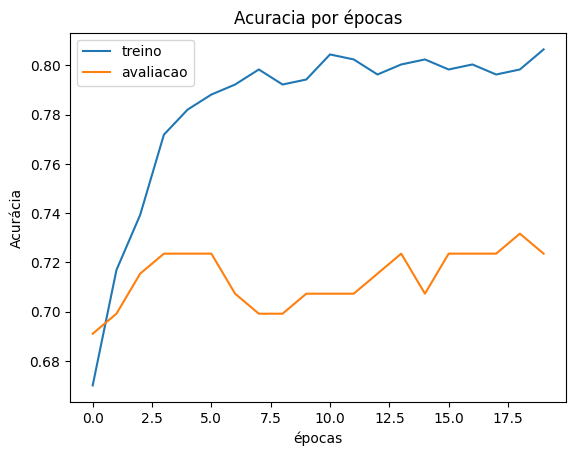

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','avaliacao'],)
plt.show()

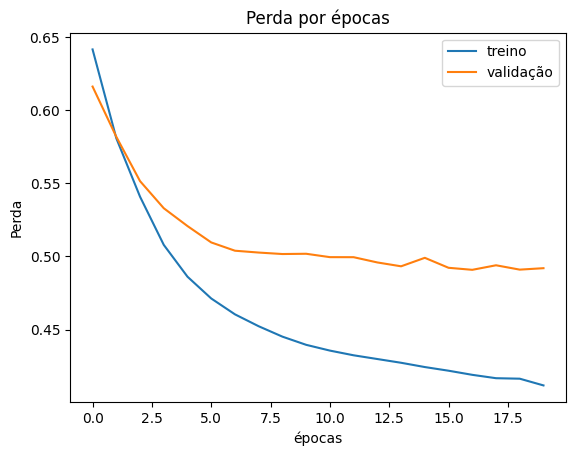

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'],)
plt.show()

#### Bloco de código para realizar a visualização de matrizes de confusão para os conj. de treino e teste, para avaliar o desempenho do modelo em relação às previsões

5/5 [==============================] - 0s 3ms/step


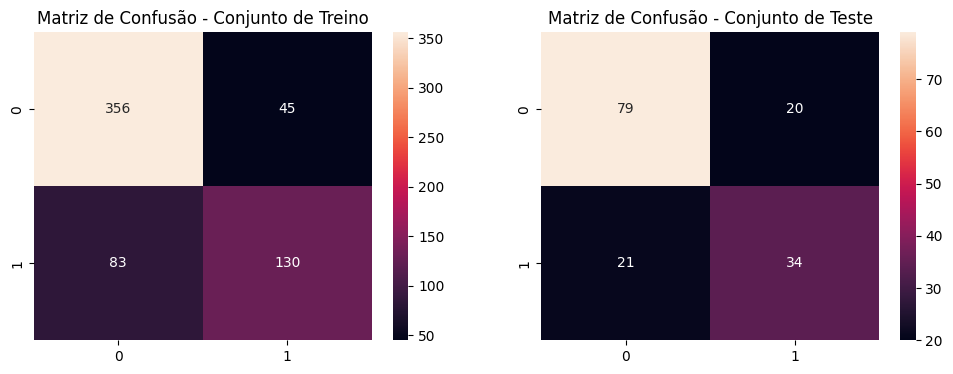

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Faz previsões no conjunto de treino e de teste
y_train_pred = model_neural.predict(X_train).round()
y_test_pred = model_neural.predict(X_test).round()

# calcula a matriz de confusão para o conjunto de treino, comparando os rótulos reais (y_train) com os rótulos previstos (y_train_pred).
train_cm = confusion_matrix(y_train, y_train_pred)

#calcula a matriz de confusão para o conjunto de teste, comparando os rótulos reais (y_test) com os rótulos previstos (y_test_pred).
test_cm = confusion_matrix(y_test, y_test_pred)

# Plota as matrizes de confusão

# cria uma figura com duas subplots (ou subfiguras) dispostas em uma linha.
# ax1 e ax2 são os objetos que representam as subplots, que serão usados para plotar as matrizes de confusão.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(train_cm, annot=True, fmt='g', ax=ax1)

sns.heatmap(test_cm, annot=True, fmt='g', ax=ax2)

#define o título da subplot ax1 como "Matriz de Confusão - Conjunto de Treino".
ax1.set_title("Matriz de Confusão - Conjunto de Treino")

#define o título da subplot ax2 como "Matriz de Confusão - Conjunto de Teste".
ax2.set_title("Matriz de Confusão - Conjunto de Teste")

# mostra os resultados
plt.show()

###Criando novos dados para testar o modelo

In [ ]:
# Geração de função que cria dados aleatórios seguindo o padrão do dataset e depois transforma para a escala do modelo

def generate_random_array(low_values=[0, 20, 12, 10, 60, 7, 0.242, 8], high_values=[6, 199, 122, 99, 846, 67, 2.429, 81]):

    # Gera um array aleatório com base nas listas low_values e high_values
    random_array = np.array([np.round(np.random.uniform(low_values[i], high_values[i]), decimals=3) for i in range(8)])

    # Lista de formatos para cada posição do array
    formatos = [",.0f", ",.0f", ",.0f", ",.0f", ",.0f", ",.0f", ",.3f", ",.0f"]

    # Formata cada elemento do array de acordo com o formato correspondente
    array_formatado = ["{:{}}".format(val, fmt) for val, fmt in zip(random_array, formatos)]

    # Converte cada elemento do array formatado em um número
    array_numerico = [float(s.replace(",", "")) if "." in s else int(s.replace(",", "")) for s in array_formatado]

    # Aplica o scaler.transform no array numérico e retorna o resultado
    return scaler.transform(np.array(array_numerico).reshape(1,-1))
    #return array_numerico

In [ ]:
# A cada execução dessa célula um novo array escalonado é criado
novo_array = generate_random_array()
print(novo_array)

[[-0.52639686  2.16017495  1.27501926  2.7624583   0.87447705 -2.06655395
  -0.29761137  3.3141307 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



#### Fazendo previsões / definindo os rótulos de classe

Aplicação de um limiar de decisão para obter rótulos de classe e fazer previsões utilizando o modelo neural em dados de entrada 'dados_para_previsao'

In [ ]:
# Dados de entrada para fazer previsões (substitua pelos seus próprios dados)
# criação da variável e atribuição à ela de um array NumPy com dados de entrada para fazer previões
# precisamos substituir o 'novo_array' pelos próprios dados
dados_para_previsao = np.array(novo_array)

# impressão do tipo da variável
type(dados_para_previsao)

# impressão dos dados de entrda
print(dados_para_previsao)

# Realização das previsões
# chamando o método predict no objeto do modelo para gerar novas previsões com base nos dados fornecidos
previsoes = model_neural.predict(dados_para_previsao)

# Aplicação do limiar de decisão (0.5) para obter rótulos de classe
rótulos_de_classe = (previsoes > 0.5).astype(int) # o método 'astype(int)' converte os valores booleanos em inteiros

#impressão do rótulo da classe resultante na saída, indicando a classe prevista (0 ou 1)
print(rótulos_de_classe)

[[-0.52639686  2.16017495  1.27501926  2.7624583   0.87447705 -2.06655395
  -0.29761137  3.3141307 ]]
1/1 [==============================] - 0s 32ms/step
[[1]]


#### Fazendo previsões / definindo a probabilidade

Verificação condicional para determinar se os rótulos de classe são iguais ou diferentes de 0 e imprimir as informações correspondentes aos blocos de códigos executados.
Dependendo do rótulo de classe previsto (0 ou 1), uma mensagem personalizada é impressa para indicar se a pessoa está propensa a ter diabetes ou não, juntamente com a probabilidade calculada.

In [ ]:
#  o bloco de código a seguir será executado se os rótulos de classe forem iguais a 0
#  verificação feita para determinar se o modelo previu que a pessoa não está propensa a ter diabetes
if rótulos_de_classe == 0:
    print(f'Com apenas {np.round(previsoes*100, 2)}% de probabilidade, a previsão é de que essa pessoa não está propensa a ter diabetes no futuro')
# se a condição acima não for atendida, executa-se esse bloco de código, ou seja rótulos de classe diferentes de 0
else:
    print(f'Com {np.round(previsoes*100, 2)}% de probabilidade, a previsão é de que esta pessoa está propensa a ter diabetes no futuro')

Com [[84.96]]% de probabilidade, a previsão é de que esta pessoa está propensa a ter diabetes no futuro


## Tunning automático de hiperparâmetros com Tensor Flow

In [ ]:
# Realizando um tuning de hiperparâmetros para encontrar qual a combinação é mais performática

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

def create_model(optimizer='adam', activation='relu', neurons=64):
    model = keras.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=[8]))
    model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': randint(32, 128),
    'batch_size': [10, 20],
    'epochs': [10, 20]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train, y_train)

<ipython-input-74-2435b8f86727>:20: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Epoch 1/10
21/21 [==============================] - 1s 3ms/step - loss: 0.7170 - accuracy: 0.5110
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.7311
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7628
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7726
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7677
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7800
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7702
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7702
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7677
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7902
Epoch 1/10
21/21 [=

In [ ]:
print(f"Best score: {round(random_search_result.best_score_*100,2)}% using {random_search_result.best_params_}")

Best score: 77.36% using {'activation': 'tanh', 'batch_size': 10, 'epochs': 20, 'neurons': 93, 'optimizer': 'adam'}


## Teste com um algoritmo de Floresta Aleatória

Treinar um modelo de classificação de floresta aleatória

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Avaliar o modelo Floresta aleatória

In [ ]:
y_pred_model_rf = model_rf.predict(X_test)
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
confusion_mat = confusion_matrix(y_test, y_pred_model_rf)
print(f'Acurácia Floresta Aleatória: {round(accuracy_model_rf*100,2)}%')
print("Matriz de confusão:\n", confusion_mat)

Acurácia Floresta Aleatória: 72.08%
Matriz de confusão:
 [[77 22]
 [21 34]]


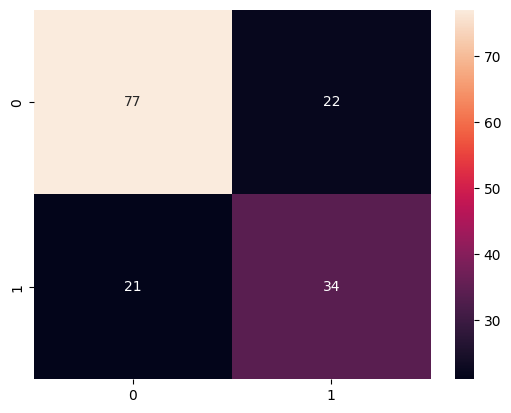

In [ ]:
# Plotando a matriz de confusão com seaborn
confusion_mat = confusion_matrix(y_test, y_pred_model_rf)
sns.heatmap(confusion_mat, annot=True)
plt.show()

## Teste com algoritmo de SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
# Treinando o modelo SVM
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred_svm = model_svm.predict(X_test)

### Avaliando o modelo

In [ ]:
# Avaliando a acurácia do modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia do modelo SVM: {round(accuracy_svm*100,2)}%')

Acurácia do modelo SVM: 75.97%


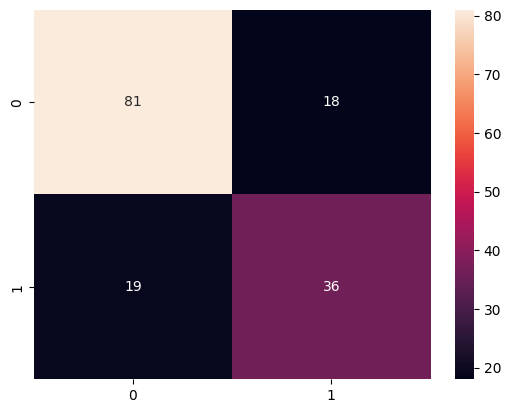

In [ ]:
# Plotando a matriz de confusão com seaborn
confusion_mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_mat_svm, annot=True)
plt.show()

## Teste com Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo de regressão logística
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred = model_lr.predict(X_test)

### Avaliando a Performance do Modelo

In [ ]:
# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo de Regressão Logística: {round(accuracy*100,2)}%')

Acurácia do modelo de Regressão Logística: 75.32%


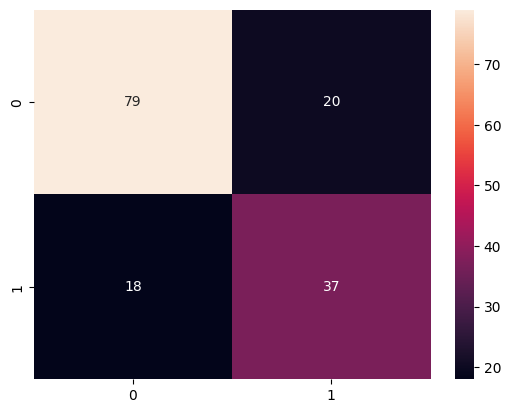

In [ ]:
confusion_mat_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat_lr, annot=True)
plt.show()

## Salvando o modelo preditivo em um arquivo

In [ ]:
# Importando a biblioteca pickle
import pickle

# Abrindo um arquivo chamado diabetesNN.py no modo de escrita binária
with open("diabetesNN.py", "wb") as file:
    # Usando o método dump para salvar o seu modelo no arquivo
    pickle.dump(model, file)

# Fechando o arquivo
file.close()

## Criando uma API para subir o modelo ao site ou aplicativo

In [ ]:
# Importando o Flask e o seu modelo salvo
from flask import Flask, request, jsonify
import pickle

# Carregando o modelo salvo do arquivo
with open("diabetesNN.py", "rb") as file:
     model = pickle.load(file)

# Criando uma instância do Flask e definindo uma rota para a sua API
app = Flask(__name__)
@app.route("/predict", methods=["POST"])

# Criando uma função que recebe um array como entrada, aplica o seu modelo salvo e retorna a previsão como saída
def predict():
    # Obtendo o array da requisição
    novo_array = request.get_json()
    # Aplicando o seu modelo salvo
    y_pred_array = model.predict(novo_array)
    y_pred_thresh = 1 if y_pred_array >= 0.6 else 0
    if y_pred_thresh == 0:
        previsao = f'Com apenas {np.round(y_pred_array.item()*100, 2)}% de probabilidade, a previsão é de que essa pessoa não está propensa a ter diabetes no futuro'
    else:
        previsao = f'Com {np.round(y_pred_array.item()*100, 2)}% de probabilidade, a previsão é de que esta pessoa está propensa a ter diabetes no futuro'
    # Convertendo a saída em um formato JSON
    output = jsonify(previsao)
    # Retornando a saída
    return output

# Usando o método run para executar a sua API localmente
if __name__ == "__main__":
    app.run(debug=True)

## Considerações sobre os modelos

Podemos observar que o modelo principal com Redes Neurais Artificiais fez uma previsão com acurácia de 75,32% e foi superado pelo modelo de SVM com 75,97%, empatando com o modelo de Regressão Logística que performou acurácia de 75,32% e vencendo apenas o de Floresta Aleatória que ficou com 72,08%. No entanto, quando realizamos um avaliação de quais hiperparâmetros do modelo principal entregam o melhor ajuste de treino, observamos que o modelo principal chega a ter a melhor performance em relação aos demais chegando a 77,19% de acurácia, justificando a escolha do grupo por usar esse algoritmo para processar as chances de uma mulher dentro do grupo observado em ter ou não diabetes, dado o conjunto de dados apresentados.

## Considerações finais

Para concluir, é importante salientar que o modelo pode ainda ser melhorado em sua performance, elevando o número de observações totais do dataset que são apenas 768 mulheres, e é sabido que o algoritmo de redes neurais artificiais performa melhor com um grande conjunto de dados. Além disso, possivelmente outras variáveis que não foram coletadas no dataset original poderiam influenciar nas chances calculadas pelo algoritmo.

Assim, o presente estudo nos serve apenas como valor didático e portanto não se recomenda para uso profissional, mas poderia ser um começo de trabalho profissional bastando para o time de dados elevar o número de observações e realizar engenharia de features, criando ou coletando novas variáveis independentes, para que o presente estudo possa vir a ganhar um escopo de uso profissional.